<a href="https://colab.research.google.com/github/OlayonChingon/ArgentinaPrograma4.0/blob/main/Compensaci%C3%B3n_por_Penalizaci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.layers import Dense
from keras.models import Sequential
from sklearn.metrics import f1_score
import gdown

# Define el enlace compartido de Google Drive
url = 'https://drive.google.com/uc?id=1UN8qP4GMmJhzbDNzxNhpnM83br1FVxI-'

# Especifica la ubicación donde deseas guardar el archivo
output = '/content/bank.csv'

# Descarga el archivo desde el enlace compartido
gdown.download(url, output, quiet=False)
data = pd.read_csv(output, sep=';')

Downloading...
From: https://drive.google.com/uc?id=1UN8qP4GMmJhzbDNzxNhpnM83br1FVxI-
To: /content/bank.csv
100%|██████████| 461k/461k [00:00<00:00, 24.0MB/s]


In [ ]:
# Procesar los datos
label_encoder = LabelEncoder()
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
for col in categorical_cols:
    data[col] = label_encoder.fit_transform(data[col])

# Transformar etiquetas a numéricas
data['y'] = label_encoder.fit_transform(data['y'])

# Dividir en características y etiquetas
X = data.drop('y', axis=1)
y = data['y']

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar las características
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

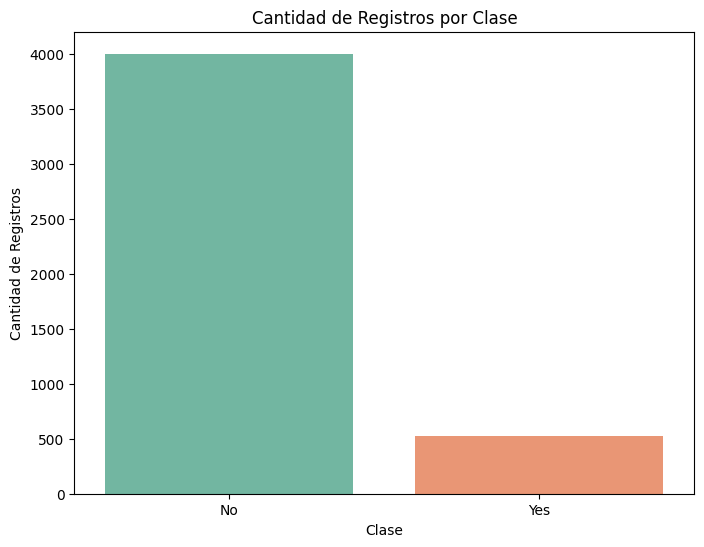

In [ ]:
# Crear un gráfico de barras para mostrar la cantidad de registros por clase
plt.figure(figsize=(8, 6))
sns.countplot(x=y, palette="Set2")
plt.xlabel('Clase')
plt.ylabel('Cantidad de Registros')
plt.title('Cantidad de Registros por Clase')
plt.xticks([0, 1], ['No', 'Yes'])  # Etiquetas personalizadas para las clases
plt.show()

In [ ]:
# Crear el modelo de red neuronal
model = Sequential()
model.add(Dense(units=128, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

# Compilar el modelo
model.compile(loss='binary_crossentropy', optimizer='adam')

# Entrenar el modelo - SIN NINGUNA TECNICA DE BALANCEO
model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)


In [ ]:
# Realizar predicciones en el conjunto de prueba
y_probs = model.predict(X_test)
y_pred = np.round(y_probs)

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Nombres de clases
class_names = ['No', 'Yes']

# Estilizar la matriz de confusión con pandas
conf_df = pd.DataFrame(conf_matrix, index=class_names, columns=class_names)

# Mostrar la matriz de confusión estilizada
print("\nMatriz de Confusión:")
print(conf_df)

#Calculamos el F1 Score
f1_test = f1_score(y_test, y_pred)
print('F1 Score: ', f1_test)

29/29 [==============================] - 0s 4ms/step

Matriz de Confusión:
      No  Yes
No   781   26
Yes   67   31
F1 Score:  0.4


INFORME DE PRESICION

In [ ]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred, labels = [0,1])
print(report)

              precision    recall  f1-score   support

           0       0.92      0.97      0.94       807
           1       0.54      0.32      0.40        98

    accuracy                           0.90       905
   macro avg       0.73      0.64      0.67       905
weighted avg       0.88      0.90      0.88       905



# Aplicando Pesos a las Clases

In [ ]:
from sklearn.utils import class_weight

# Calculamos que peso tendria que tener cada clase para que este balanceado.
class_weight = class_weight.compute_class_weight('balanced',
                                                 classes=np.unique(y_train),
                                                 y=y_train)
weights_dict = {i:w for i,w in enumerate(class_weight)}
print("Pesos por clase: \n", weights_dict)

# Crear el modelo de red neuronal
model = Sequential()
model.add(Dense(units=128, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

# Reducir la tasa de aprendizaje a 0.0005. COMO METODOLOGIA PARA MEJORAR LA SENSIBILIDAD Y PRECISION
optimizer = keras.optimizers.Adam(learning_rate=0.0005)


# Compilar el MODELO
model.compile(loss='binary_crossentropy', optimizer='adam')
# Entrenar el modelo - APLICANDO PESOS A CADA CLASE
model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0, class_weight=weights_dict)

Pesos por clase: 
 {0: 0.5662386470404008, 1: 4.274231678486998}


In [ ]:
# Realizar predicciones en el conjunto de prueba
y_probs = model.predict(X_test)
y_pred = np.round(y_probs)

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Nombres de clases
class_names = ['No', 'Yes']

# Estilizar la matriz de confusión con pandas
conf_df = pd.DataFrame(conf_matrix, index=class_names, columns=class_names)

# Mostrar la matriz de confusión estilizada
print("\nMatriz de Confusión:")
print(conf_df)

#Calculamos el F1 Score
f1_test = f1_score(y_test, y_pred)
print('F1 Score: ', f1_test)

29/29 [==============================] - 0s 1ms/step

Matriz de Confusión:
      No  Yes
No   661  146
Yes   22   76
F1 Score:  0.475


INFORME DE PRESICION



In [ ]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred, labels = [0,1])
print(report)

              precision    recall  f1-score   support

           0       0.97      0.82      0.89       807
           1       0.34      0.78      0.47        98

    accuracy                           0.81       905
   macro avg       0.66      0.80      0.68       905
weighted avg       0.90      0.81      0.84       905




##Modificar los pesos
##función compute_class_weight del módulo sklearn.utils.class_weight

**class_weight = class_weight.compute_class_weight('balanced',
                                                 classes=np.unique(y_train),
                                                 y=y_train)**

El método compute_class_weight toma tres argumentos:

*'balanced':* indica que se deben calcular los pesos de clase de manera
equilibrada, teniendo en cuenta el desequilibrio en el conjunto de datos.



*"classes":* especifica las clases únicas presentes en el conjunto de entrenamiento.

*"y":* es el arreglo de etiquetas de clase correspondientes al conjunto de entrenamiento.

El resultado de compute_class_weight es un arreglo de pesos por clase, donde cada peso se asigna a la clase correspondiente en el mismo orden en que se especificaron las clases únicas.

**weights_dict = {i:w for i,w in enumerate(class_weight)}
print("Pesos por clase: \n", weights_dict)**

Luego, creamos un diccionario weights_dict donde asignamos cada clase a su respectivo peso utilizando un bucle enumerate.

Finalmente, imprimimos los pesos por clase utilizando print("Pesos por clase: \n", weights_dict).

Estos pesos por clase se pueden utilizar en el entrenamiento del modelo para dar más importancia a las clases minoritarias y contrarrestar el desequilibrio de clases.

#reducir la tasa de aprendizaje

Reducir la tasa de aprendizaje a 0.0005. COMO METODOLOGIA PARA MEJORAR LA SENSIBILIDAD Y PRECISION
optimizer = keras.optimizers.Adam(learning_rate=0.0005)"
